In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps for plottting

%matplotlib inline

In [2]:
base_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MaricopaCounty/' 

In [3]:
base_url = '/home/jsignell/erddapData/MaricopaCounty/'

In [4]:
meta = pd.read_csv("./sensor_ids.csv")
meta['DEV_ID'] = meta['DEV_ID'].astype(int).astype(str)

In [5]:
meta.head()

,DEV_ID,DEV_NAME,DEV_TYPE,DEV_DATE,STA_LAT_DMS,STA_LONG_DMS,STA_ELEV,STA_LOC
0,358,Mt. Union Repeater,Rptr. Batt.,4/28/1992 0:00:00,34 24 54.3,112 24 16.9,7980.0,"Top of Mt. Union, 10 mi. SSE of Prescott"
1,754,Sacaton Peak,Rptr. Batt.,6/11/1996 0:00:00,33 00 09.5,111 40 26.8,2720.0,4.5 miles E. of the SR387 / I-10 junction
2,770,Tat Momolikot Dam,Precip.,1/29/1998 0:00:00,32 39 04.2,111 55 42.0,1530.0,19 miles SW of Casa Grande
3,773,Tat Momolikot Dam,Stream PT,1/19/2000 0:00:00,32 39 04.2,111 55 42.0,1530.0,19 miles SW of Casa Grande
4,775,Gila R. @ Maricopa Rd,Precip.,4/6/1995 0:00:00,33 10 15.0,112 00 21.7,1135.0,Gila River at Maricopa Road bridge


In [6]:
meta.groupby('DEV_TYPE').count().iloc[:,0]

DEV_TYPE
Ave. Wind         3
Bubbler           3
Dewpoint         36
Flasher           4
Humidity         36
Non Subm PT      14
Peak Wind        30
Precip.         312
Pressure         24
Radar             1
Rptr. Batt.       3
Solar Rad.       23
Status            7
Stream PT       158
Temperature      36
Water Temp.       2
Wind Dir.        30
Wind Spd/Dir     27
Name: DEV_ID, dtype: int64

In [7]:
meta[meta['DEV_NAME'] == 'Bartlett Lake']

,DEV_ID,DEV_NAME,DEV_TYPE,DEV_DATE,STA_LAT_DMS,STA_LONG_DMS,STA_ELEV,STA_LOC
478,5904,Bartlett Lake,Peak Wind,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
479,5907,Bartlett Lake,Wind Spd/Dir,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
480,5908,Bartlett Lake,Dewpoint,1/1/2001 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
481,5910,Bartlett Lake,Precip.,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
482,5911,Bartlett Lake,Humidity,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
483,5912,Bartlett Lake,Temperature,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
484,5913,Bartlett Lake,Solar Rad.,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
485,5914,Bartlett Lake,Pressure,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station
487,5917,Bartlett Lake,Wind Dir.,8/31/2000 0:00:00,33 50 18.3,111 38 06.2,1780.0,Bartlett Lake Sheriff Sub-station


In [8]:
ds = xr.open_dataset(base_url+'5907.nc')
ds

<xarray.Dataset>
Dimensions:          (time: 459139)
Coordinates:
  * time             (time) datetime64[ns] 2000-08-31T16:25:48 ...
    lat              float64 33.84
    lon              float64 -111.6
    elev             float64 1.78e+03
Data variables:
    Ave. Wind Speed  (time) float64 0.0 6.1 4.2 0.0 0.0 0.7 3.9 5.2 4.2 7.1 ...
Attributes:
    featureType: timeSeries
    author: jsignell@princeton.edu
    Conventions: CF-1.6
    references: http://alert.fcd.maricopa.gov/showrpts_mc.html
    institution: Data from Flood Control District of Maricopa County, hosted by Princeton University
    history: Created by Princeton University Hydrometeorology Group at 2016-06-03 21:29:16.072679 
    DEV_ID: 5907
    STA_LAT_DMS: 33 50 18.3
    DEV_TYPE: Wind Spd/Dir
    STA_LOC: Bartlett Lake Sheriff Sub-station
    STA_ELEV: 1780.0
    DEV_NAME: Bartlett Lake
    STA_LONG_DMS: 111 38 06.2
    DEV_DATE: 8/31/2000 0:00:00

## Data are often messy:

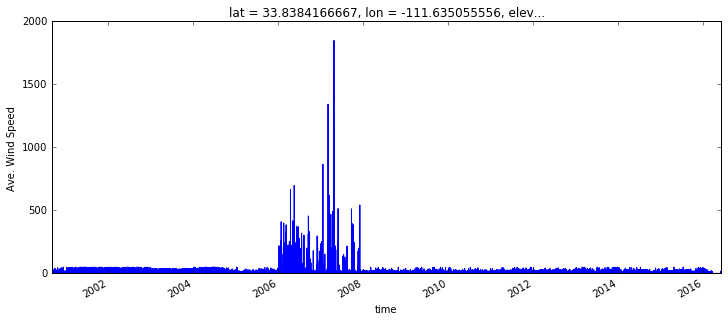

In [9]:
plt.figure(figsize=(12,5))
ds['Ave. Wind Speed'].plot();

The values over 50 are clearly some type of malfunction. We can remove these by dropping everytime at shich the wind speed is over 50. 

In [37]:
df = ds.to_dataframe()

In [78]:
df = df.drop(df[df['Ave. Wind Speed'] > 50].index, axis=0)

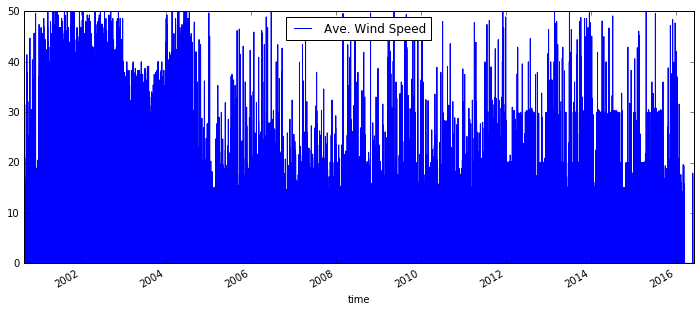

In [114]:
df.plot(y='Ave. Wind Speed', figsize=(12,5));

There is also a strange gap in this year's data. This one will be harder to fix because the values aren't above some threshold. 0 is an acceptable wind speed, just not all the time.

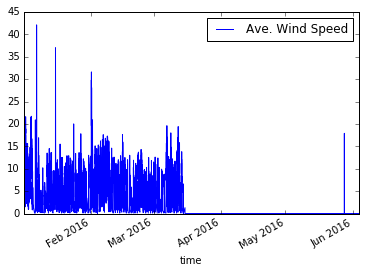

In [113]:
df['2016'].plot(y='Ave. Wind Speed');

For now let's just have the data stop at March

In [121]:
df = df[:'2016-03']

In [122]:
df['Ave. Wind Speed'].describe()

count    452906.000000
mean          8.193567
std           5.026647
min           0.000000
25%           5.100000
50%           8.000000
75%          10.800000
max          50.000000
Name: Ave. Wind Speed, dtype: float64

## Diurnal cycle

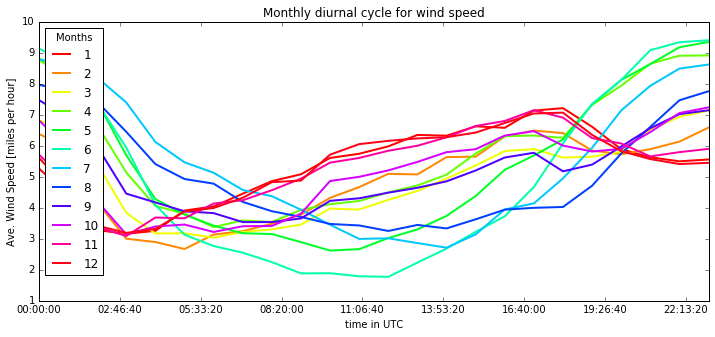

In [123]:
df_H = df.resample('1H', label='right').mean()

# by changing just these two variables, you can create a whole new presentation-quality plot
var = 'Ave. Wind Speed'
title = 'Monthly diurnal cycle for wind speed'

# pivot the data to make the index time of day and the columns the months
pv = pd.pivot_table(df_H,
                    index=df_H.index.time, 
                    columns=df_H.index.month, 
                    values=var, aggfunc='mean')

# set the colors to a discretized circular colormap to fit cyclical data
pv.plot(figsize=(12,5), color=cm.hsv(np.linspace(0, 1, 12)), linewidth=2, title=title)
plt.legend(title='Months', loc='upper left')

# using this method we can create labels that depend only on var
plt.ylabel('{var} [{units}]'.format(var=var, units=ds[var].units))
plt.xlabel('time in UTC');

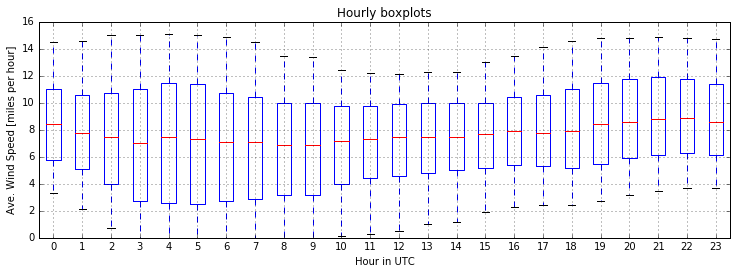

In [127]:
# create a box plot
df.boxplot(column=var, by=df.index.hour, whis= [10, 90], sym='', figsize=(12,4))

# set the labels
plt.ylabel('{var} [{units}]'.format(var=var, units=ds[var].units))
plt.xlabel('Hour in UTC');
plt.title('Hourly boxplots')
plt.suptitle('')

plt.show()